In [1]:
%matplotlib inline 
from matplotlib import style 
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np 
import pandas as pd 

In [4]:
import datetime as dt 

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [10]:
# Reflect an existing database into a new model
Base = automap_base()

# Reflect the tables
Base.prepare(engine, reflect = True)

In [11]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table 
Measurement = Base.classes.measurement
Station = Base.classes.station 

In [13]:
# Create session (link) from Python to the DB 
session = Session(engine)

# Exploratory Climate Analysis

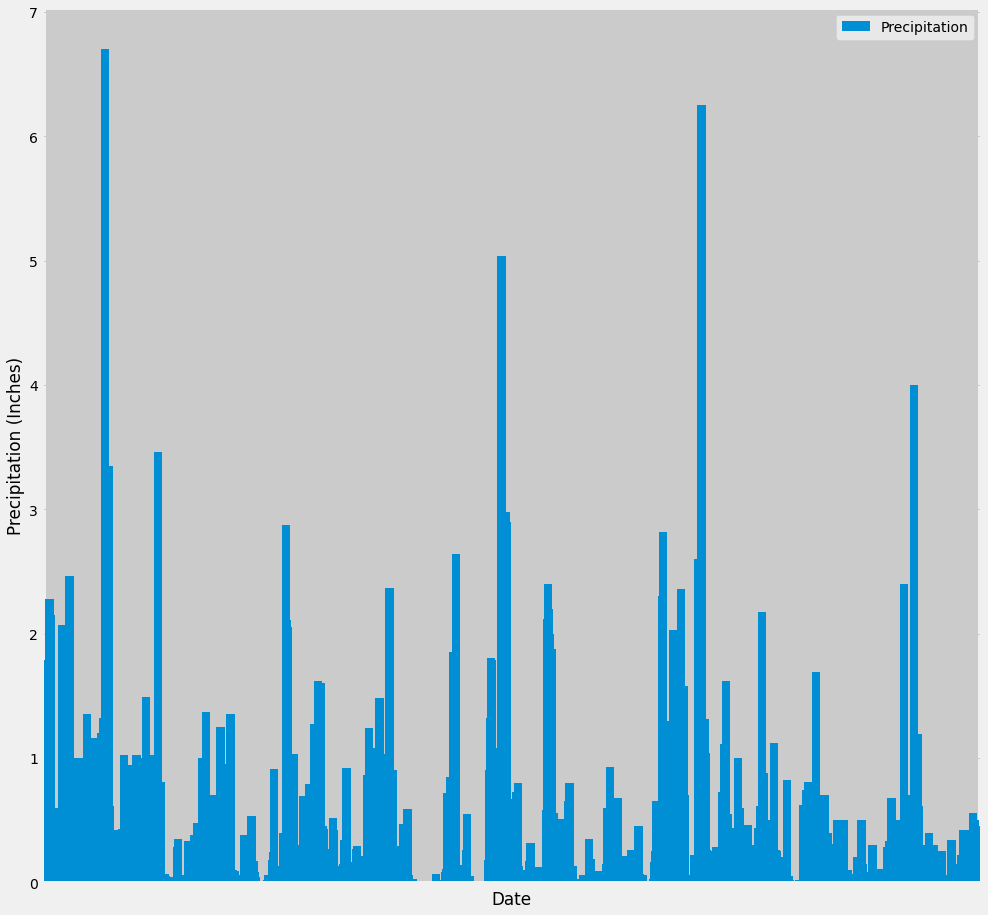

<Figure size 432x288 with 0 Axes>

In [75]:
# Retrieve the last 12 months of precipitation data and plot the results 

# Last Date in the database 
last_str = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_str

# Date 1 year ago from the last data point in the database 
last_dt = dt.datetime.strptime(last_str[0], '%Y-%m-%d')

prior_dt = dt.date(last_dt.year -1, last_dt.month, last_dt.day)
prior_dt 

# Retrieve the data and precipitation scores 
sel = [Measurement.date, Measurement.prcp]
queryresult = session.query(*sel).filter(Measurement.date >= prior_dt).all()

# Save results as a Pandas DataFram and set the index to the date column 
prcp_df = pd.DataFrame(queryresult, columns = ['Date', 'Precipitation'])
prcp_df.set_index("Date", inplace = True)
prcp_df.head()

# Sort the DataFrame by date
prcp_df = prcp_df.sort_values(["Date"])
prcp_df.head(20)

# Use Pandas plotting with Matplotlib to plot the data 
prcp_graph = prcp_df.plot.bar(figsize = (15,15), width = 20)
prcp_graph.set_xlabel("Date")
prcp_graph.set_ylabel("Precipitation (Inches)")
prcp_graph.set_xticklabels([])
plt.show()
plt.tight_layout()

In [42]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [43]:
# How many stations are available in this dataset? 
session.query(Station.id).count()

9

In [45]:
# What are the most active stations? (i.e. what statiosn have the most rows)?
sel = [Measurement.station, func.count(Measurement.id)]
activestations = session.query(*sel).group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).all()

# List the stations and the counts in descending order
activestations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [59]:
# Most Active Station

most_active = activestations[0]
most_active

# Calculate the lowest temperature recorded, highest temperature recorded, average temperature recorded 
sel = [func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]
most_activedata = session.query(*sel).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).first()
most_activedata

(54.0, 85.0, 71.66378066378067)

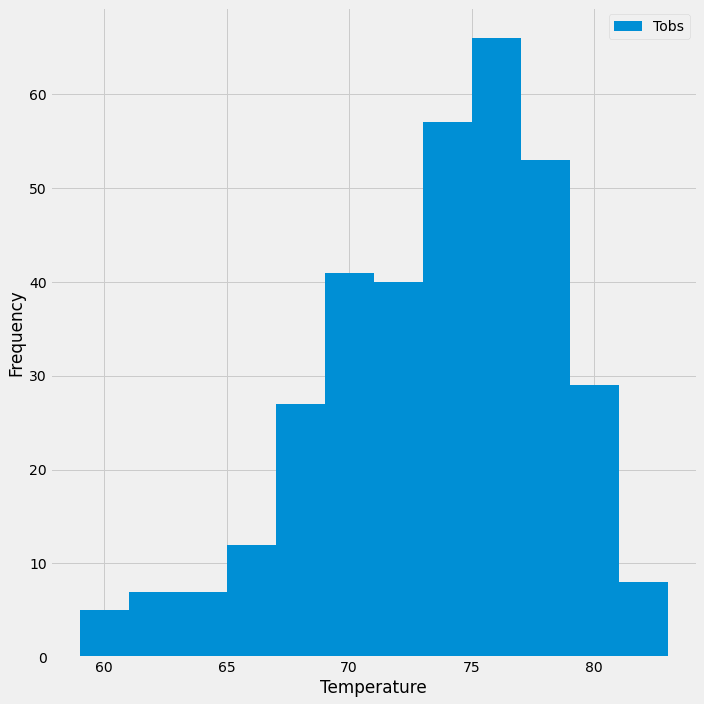

In [71]:
# Choose the station with the highest number of temperature observations 
most_tempobvs = session.query(Measurement.tobs).\
                    filter(Measurement.station == 'USC00519281').\
                    filter(Measurement.date >= prior_dt).all()

temp_obvs = pd.DataFrame(most_tempobvs, columns = ['Tobs'])
temp_obvs.head()

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plt.figure(figsize = (10,10))
plt.hist(temp_obvs["Tobs"], bins = 12)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.legend(["Tobs"])
plt.tight_layout()
plt.show()